In [2]:
import pyforest
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [6]:
# importing .csv files using Pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
train['Sex'] = train['Sex'].apply(lambda x: 1 if x == 'male' else 2)


In [10]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
train.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId', 'Parch', 'Embarked'], inplace=True)

In [16]:
X = train.drop(['Survived'], axis=1)
y = train.Survived

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

<IPython.core.display.Javascript object>

In [18]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [19]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:01<00:00, 19.00it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.82,0.81,0.81,0.82,0.11
LabelPropagation,0.82,0.80,0.80,0.81,0.03
PassiveAggressiveClassifier,0.78,0.80,0.80,0.78,0.03
NuSVC,0.81,0.80,0.80,0.81,0.02
LabelSpreading,0.81,0.80,0.80,0.81,0.04
XGBClassifier,0.81,0.79,0.79,0.81,0.22
KNeighborsClassifier,0.81,0.79,0.79,0.81,0.02
SGDClassifier,0.81,0.79,0.79,0.81,0.02
AdaBoostClassifier,0.80,0.79,0.79,0.80,0.16


In [20]:
    import lightgbm as ltb


In [22]:
model = ltb.LGBMClassifier()
model.fit(X_train, y_train)
print(); print(model)
    
expected_y  = y_test
predicted_y = model.predict(X_test)


LGBMClassifier()


In [23]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       134
           1       0.77      0.75      0.76        89

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223

[[114  20]
 [ 22  67]]


In [24]:
model = ltb.LGBMRegressor()
model.fit(X_train, y_train)
print(); print(model)

expected_y  = y_test
predicted_y = model.predict(X_test)


LGBMRegressor()


In [29]:
print(metrics.r2_score(expected_y, predicted_y))


0.41016985390636884


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Survived'>

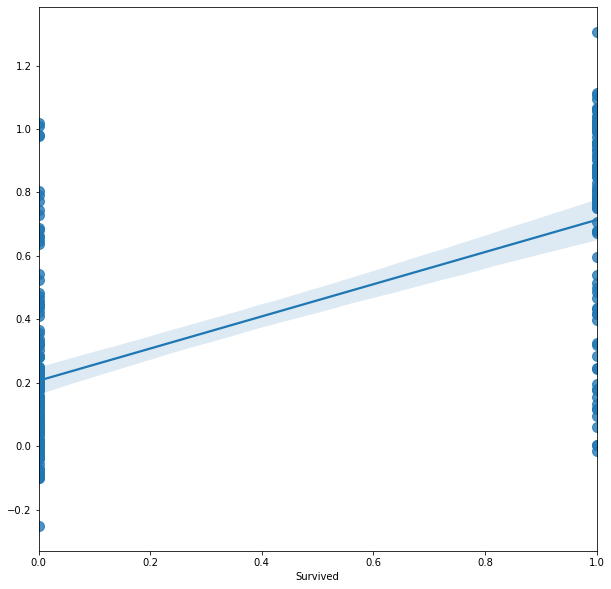

In [31]:
plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})